"""
Introduction to Data Science 

Programming Exercise: 03

Name: Le Vo Bao Tram

Student ID: 21280052
"""

In [747]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import random
import seaborn as sns
from numpy import math
from numpy import arange
from sklearn.model_selection import RepeatedKFold

In [748]:
#Importing the dataset
df=pd.read_csv('https://raw.githubusercontent.com/hduc-le/Introduction-to-data-science/main/datasets/Consumo_cerveja.csv')
df.head()


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900


Tempetura Media: median of temperature in Celsius degree

Tempetura Minama: min of temperature in Celsius degree

Tempetura Maxima: max of temperature in Celsius degree

Precipitacao: precipitation (lượng mưa) in mm

Final de Semana: whether the weekend or not (0 or 1)

Consumo de cerveja: the amount of beer consumed in a day (liters)



In [749]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [750]:
df.isnull().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [751]:
df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


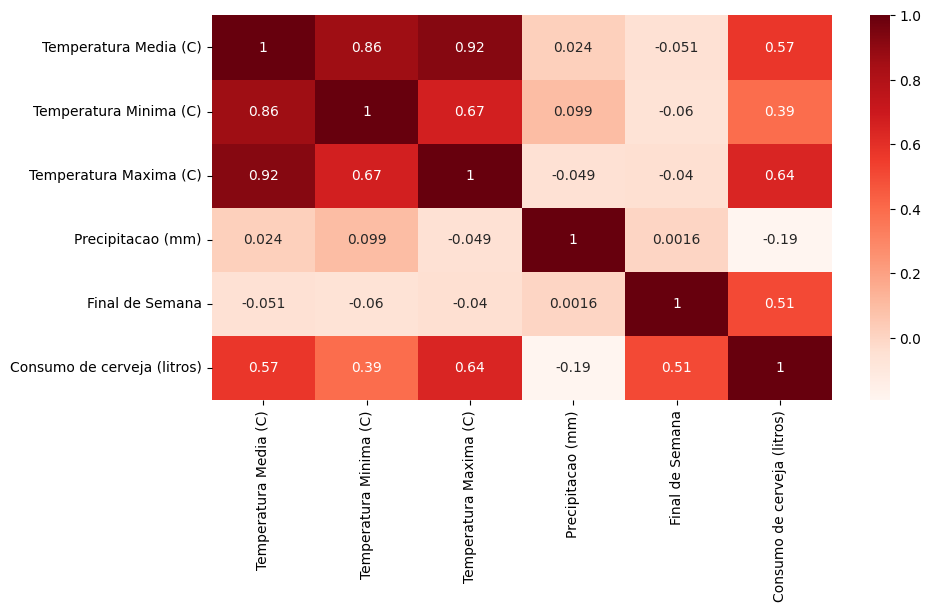

In [752]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap =plt.cm.Reds)
plt.show()


In [753]:
X = df[['Temperatura Media (C)', 'Temperatura Maxima (C)', 'Final de Semana']].values
y = df['Consumo de cerveja (litros)'].values

In [754]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

In [756]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [757]:
X_train

array([[ 0.86135544,  1.1098348 , -0.59697821],
       [-0.06986221, -0.63372863, -0.59697821],
       [-1.23236267, -1.34491897, -0.59697821],
       [ 0.37444425,  0.12334497, -0.59697821],
       [ 0.44139454,  0.03157847, -0.59697821],
       [-0.38635448, -0.81726162, -0.59697821],
       [-1.50016382, -1.50551034, -0.59697821],
       [ 0.167507  ,  0.37570283, -0.59697821],
       [-1.56102772, -1.9414012 ,  1.67510303],
       [ 0.14924783,  0.28393634, -0.59697821],
       [ 0.24054367,  0.19216984, -0.59697821],
       [ 0.526604  ,  0.21511146,  1.67510303],
       [ 0.41704898,  0.5362942 , -0.59697821],
       [ 0.64833179,  1.08689318, -0.59697821],
       [-0.24028112, -0.56490376,  1.67510303],
       [-0.82457455, -0.24372102, -0.59697821],
       [ 0.80657793,  0.94924343, -0.59697821],
       [-1.18975794, -1.06961949, -0.59697821],
       [ 0.65441818,  0.67394395,  1.67510303],
       [ 0.91613294,  0.90336019, -0.59697821],
       [ 0.10055671,  0.30687796, -0.596

In [758]:
#Fitting Multiple linear regression to the Training test
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression()

In [759]:
# The model intercept
regressor.intercept_

25.183457859488755

In [760]:
regressor.coef_

array([-0.4055994 ,  2.95880059,  2.29582655])

In [761]:
# Lasso Regression

In [762]:
lasso = Lasso(alpha=0.1).fit(X_test, y_test)


In [763]:
# The model intercept
lasso.intercept_

25.201262777174534

In [764]:
#The model coefficients
lasso.coef_

array([0.        , 2.51424066, 2.21162226])

In [765]:
#Fitting the ridge regression model
#Import Ridge function
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_test, y_test)

In [766]:
# The model intercept
ridge.intercept_

25.18488657728427

In [767]:
# The model coefficients
ridge.coef_

array([-0.24862584,  2.80163331,  2.27901496])

In [768]:

print("Linear Regression")
print(">> Test MSE : ", mean_squared_error(regressor.predict(X_test), y_test),'RMSE: ',math.sqrt(mean_squared_error( regressor.predict(X_test), y_test)), 'R2-score: ',r2_score(y_test,  regressor.predict(X_test)), 'MAE: ', mean_absolute_error(y_test, regressor.predict(X_test) ))
print("Lasso Regresion")
print(">> Test MSE : ", mean_squared_error( lasso.predict(X_test), y_test),'RMSE: ',math.sqrt(mean_squared_error( lasso.predict(X_test), y_test)), 'R2-score: ',r2_score(y_test,  lasso.predict(X_test)), 'MAE: ', mean_absolute_error(y_test, lasso.predict(X_test) ))
print('Ridge Regression')
print(">> Test MSE : ", mean_squared_error( ridge.predict(X_test), y_test),'RMSE: ',math.sqrt(mean_squared_error( ridge.predict(X_test), y_test)), 'R2-score: ',r2_score(y_test,  ridge.predict(X_test)), 'MAE: ', mean_absolute_error(y_test, ridge.predict(X_test) ))


Linear Regression
>> Test MSE :  5.880865835317948 RMSE:  2.4250496562581865 R2-score:  0.6745084671101678 MAE:  1.9581590802850974
Lasso Regresion
>> Test MSE :  5.9249211948418665 RMSE:  2.4341161013480574 R2-score:  0.6720701107686007 MAE:  1.9759251157601756
Ridge Regression
>> Test MSE :  5.885571895740625 RMSE:  2.4260197640869756 R2-score:  0.6742479981819957 MAE:  1.9594903692113927


Evaluate the models

In this exercise, the MSE, RMSE, MAR of Linear Regression is smaller Lasso and Ridge. The R2-score of Lasso is smaller the other.
The metrics such as MSE, RMSE, MAE is smaller => The model is better.
Therefore, I choose Linear Regression which is the best model.
However, this is an experiment and we must consider every aspect before evaluating.